In [1]:
!python -m pip install pandas_datareader

In [2]:
!python -m pip install TensorFlow

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [11]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np 
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import datasets
import seaborn as sns  # Bibliothèque pour la visualisation des données
import tensorflow.compat.v1 as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
sp_data.head()

6

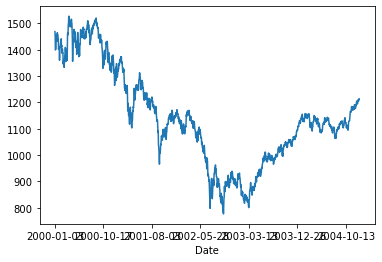

In [18]:
#sp_data.to_csv(r'C:\Users\Hp EliteBook\Desktop\lsi2\s4\maching-learning\project\SP_500\sp_data_tf.csv', index = True)
sp_data= pd.read_csv(r'C:\Users\Hp EliteBook\Desktop\lsi2\s4\maching-learning\project\SP_500\sp_data_tf.csv', index_col=0)
# Change to datetime datatype.
#sp_data.loc[:, 'Date'] = pd.to_datetime(sp_data.loc[:,'Date'], format="%Y/%m/%d")
#df = df.drop(['index'], axis = 1)
sp_data['Open'].plot()
sp_data=sp_data.values
sp_data.shape[1]

In [ ]:
data.head()

In [ ]:
df.describe()


In [ ]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 7)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
data_test.head()

In [ ]:
df_train = pd.DataFrame(data_training, columns = ['Date','High','Low','Open','Close','volume','Adj Close'])
past_60_days = df_train.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df = df.drop(['index', 'Volume'], axis = 1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

In [ ]:
inputs = scaler.transform(df)
inputs

In [ ]:
from platform import python_version

print(python_version())

code

#hello 

# HELLO

 # # nice